# Asyncio

Asyncio is a Python library that provides support for asynchronous programming. It allows you to write concurrent code that performs non-blocking I/O operations, making it well-suited for applications that need to handle many connections or I/O-bound tasks efficiently. 

## Concurrent vs. Parallel - Ways tasks are executed.

**Concurrency** refers to the ability of a system to execute multiple tasks or processes in overlapping time periods, enabling efficient resource utilization and responsiveness, even on a single processing unit.

**Parallelism** is a specific kind of concurrency where tasks are really executed simultaneously. In computer science, parallelism can only be achieved in multicore environments.

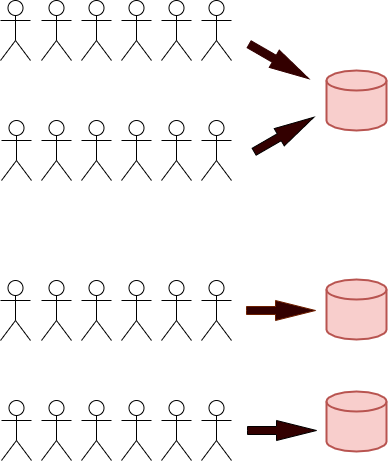

## Synchronous vs. Asynchronous - Programming models.

In **Synchronous**, you write code as steps that are executed in order, from top to bottom. In an **Asynchronous** programming model, you write code as tasks, which are then executed concurrently. Executing concurrently means that all the tasks are likely executed at the same time.



In [1]:
import time

def count():
    print("One")
    time.sleep(1)
    print("Two")

def main():
    for _ in range(3):
        count()

if __name__ == "__main__":
    s = time.perf_counter()
    main()
    elapsed = time.perf_counter() - s
    print(f"Task executed in {elapsed:0.2f} seconds.")

One
Two
One
Two
One
Two
Task executed in 3.00 seconds.


In [2]:
import asyncio
import time

async def count():
    print("One")
    await asyncio.sleep(1)
    print("Two")

async def main():
    await asyncio.gather(count(), count(), count())

if __name__ == "__main__":    
    s = time.perf_counter()
    asyncio.run(main())  # if running inside jupyter use `await main()` instead
    elapsed = time.perf_counter() - s
    print(f"Task executed in {elapsed:0.2f} seconds.")

One
One
One
Two
Two
Two
Task executed in 1.01 seconds.


## Basic concepts

1. **`async def`**: This keyword is used to define a coroutine function, which can be awaited asynchronously. For example:
   ```python
   async def my_coroutine():
       # asynchronous code here
   ```
   
2. **`await`**: This keyword is used inside coroutine functions to await the result of another coroutine or a Future object. It suspends the execution of the coroutine until the awaited coroutine or Future completes. For example:
   ```python
   async def my_coroutine():
       result = await some_async_function()
   ```
   
3. **`asyncio.sleep()`**: This function suspends the execution of the current coroutine for a specified amount of time (in seconds) without blocking the event loop. It is often used to simulate asynchronous delays. For example:
   ```python
   async def my_coroutine():
       await asyncio.sleep(1)
       print("One second has passed.")
   ```
   
5. **`asyncio.run()`**: This function is used to run the top-level entry point coroutine in an asyncio application. It creates an event loop, runs the coroutine until it completes, and then closes the event loop. For example:
   ```python
   asyncio.run(main_coroutine())
   ```
   
8. **`asyncio.gather()`**: This function is used to concurrently run multiple coroutines and wait for all of them to complete. It returns a list of results in the same order as the coroutines passed to it. For example:
   ```python
   results = await asyncio.gather(coroutine1(), coroutine2(), coroutine3())
   ```
     
4. **`async with`**: This syntax allows you to use asynchronous context managers, which are like regular context managers but support asynchronous operations. For example:
   ```python
   async with async_open('file.txt') as file:
       data = await file.read()
   ```

9. **`async for`**: This construct is used to asynchronously iterate over an asynchronous iterable. It is often used to iterate over the results of asynchronous generators or asynchronous iterators. For example:
```python
async def async_generator():
    for i in range(5):
        yield i

async def my_coroutine():
    async for item in async_generator():
        print(item)
```

In [3]:
async def g():
    # Pause here and come back to g() when f() is ready
    r = await f()
    return r

## Concurent random number search

In [4]:
import asyncio
import random

# ANSI colors
c = (
    "\033[32m",  # Green
    "\033[91m",  # Red
    "\033[34m",  # Blue
)

def color_print(text, color_idx):
    print(c[color_idx] + text + "\033[0m")

async def makerandom(idx: int, threshold: int = 6) -> int:
    color_print(f"Initiated makerandom({idx}).", idx)
    i = random.randint(0, 10)
    while i <= threshold:
        color_print(f"makerandom({idx}) == {i} too low; retrying.", idx)
        await asyncio.sleep(idx + 1)
        i = random.randint(0, 10)
    color_print(f"---> Finished: makerandom({idx}) == {i}", idx)
    return i

async def main():
    res = await asyncio.gather(*(makerandom(i, 8) for i in range(3)))
    return res

if __name__ == "__main__":
    random.seed(444)
    r1, r2, r3 = asyncio.run(main())  # if running inside jupyter use `await main()` instead
    print(f"r1: {r1}, r2: {r2}, r3: {r3}")

Initiated makerandom(0).
makerandom(0) == 4 too low; retrying.
Initiated makerandom(1).
makerandom(1) == 4 too low; retrying.
Initiated makerandom(2).
makerandom(2) == 0 too low; retrying.
makerandom(0) == 4 too low; retrying.
makerandom(1) == 7 too low; retrying.
makerandom(0) == 4 too low; retrying.
makerandom(2) == 4 too low; retrying.
makerandom(0) == 8 too low; retrying.
---> Finished: makerandom(1) == 10
makerandom(0) == 7 too low; retrying.
makerandom(0) == 8 too low; retrying.
makerandom(2) == 4 too low; retrying.
makerandom(0) == 7 too low; retrying.
makerandom(0) == 1 too low; retrying.
makerandom(0) == 6 too low; retrying.
---> Finished: makerandom(2) == 9
makerandom(0) == 3 too low; retrying.
---> Finished: makerandom(0) == 9
r1: 9, r2: 10, r3: 9


## Asyncio Tasks and TaskGroup

New in `python3.11` 

An asyncio task represents the execution of a coroutine in the event loop. It is a higher-level abstraction built on top of coroutines.

An asyncio task group is a context manager provided by the asyncio module for managing multiple concurrent tasks.

In [5]:
import asyncio

# Define some asynchronous coroutine functions
async def coroutine1():
    print("Coroutine 1 started")
    await asyncio.sleep(2)
    print("Coroutine 1 finished")
    return "Result from coroutine 1"

async def coroutine2():
    print("Coroutine 2 started")
    await asyncio.sleep(1)
    print("Coroutine 2 finished")
    return "Result from coroutine 2"

async def main():
    # Create tasks from the coroutines
    task1 = asyncio.create_task(coroutine1())
    task2 = asyncio.create_task(coroutine2())

    # Wait for all tasks to complete
    results = await asyncio.gather(task1, task2)

    # Print the results
    for result in results:
        print("Result:", result)

# Run the main coroutine
asyncio.run(main())  # if running inside jupyter use `await main()` instead

Coroutine 1 started
Coroutine 2 started
Coroutine 2 finished
Coroutine 1 finished
Result: Result from coroutine 1
Result: Result from coroutine 2


In [6]:
import asyncio

# Define some asynchronous coroutine functions
async def coroutine1():
    print("Coroutine 1 started")
    await asyncio.sleep(2)
    print("Coroutine 1 finished")
    return "Result from coroutine 1"

async def coroutine2():
    print("Coroutine 2 started")
    await asyncio.sleep(1)
    print("Coroutine 2 finished")
    return "Result from coroutine 2"

async def main():
    async with asyncio.TaskGroup() as tg:
        # Schedule coroutines to run concurrently within the task group
        task1 = tg.create_task(coroutine1())
        task2 = tg.create_task(coroutine2())

    # Access results obtained from the task group
    results = [await task1, await task2]

    # Print the results
    for result in results:
        print("Result:", result)

# Run the main coroutine
asyncio.run(main())  # if running inside jupyter use `await main()` instead

Coroutine 1 started
Coroutine 2 started
Coroutine 2 finished
Coroutine 1 finished
Result: Result from coroutine 1
Result: Result from coroutine 2


## Synchronous and asynchronous images downloading

In [7]:
import requests
import time

# image urls for download
img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

start_measure = time.time()

# Function for downloading
def download_image(img_url):
    img_name = f"photo-{img_url[-3:]}"
    print(f'Downloading {img_name}')
    img_bytes = requests.get(img_url).content
    with open(f"images/{img_name}.jpg", 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')

def main():
    # Download images
    for url in img_urls:
        download_image(url)
    
    stop_measure = time.time()
    
    print('Finished in {} seconds'.format(stop_measure-start_measure))

main()

photo-759 was downloaded...
photo-719 was downloaded...
photo-97c was downloaded...
photo-d79 was downloaded...
photo-235 was downloaded...
photo-4b6 was downloaded...
photo-267 was downloaded...
photo-c03 was downloaded...
photo-097 was downloaded...
photo-c0e was downloaded...
photo-cde was downloaded...
photo-b99 was downloaded...
photo-a84 was downloaded...
photo-70e was downloaded...
photo-f0c was downloaded...
Finished in 15.556760787963867 seconds


In [8]:
import requests
from aiohttp import ClientSession

# image urls for download
img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

start_measure = time.time()

async def get_image_data(url):
    async with ClientSession() as session:
        async with session.get(url) as response:
            response = await response.read()
            return response

# Function for downloading
async def download_image(img_url):
    img_name = f"photo-{img_url[-3:]}"
    print(f'Downloading {img_name}')
    img_bytes = await get_image_data(img_url)
    with open(f"images/{img_name}.jpg", 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')
        
async def main():

    tasks = []  # prepare a list for future threads

    for url in img_urls:
        task = asyncio.create_task(download_image(url))
        tasks.append(task)

    await asyncio.gather(*tasks)

    stop_measure = time.time()

    print('Finished in {} seconds'.format(stop_measure - start_measure))
    
asyncio.run(main())  # if running inside jupyter use `await main()` instead

photo-c03 was downloaded...
photo-097 was downloaded...
photo-759 was downloaded...
photo-719 was downloaded...
photo-97c was downloaded...
photo-a84 was downloaded...
photo-d79 was downloaded...
photo-267 was downloaded...
photo-70e was downloaded...
photo-4b6 was downloaded...
photo-f0c was downloaded...
photo-b99 was downloaded...
photo-235 was downloaded...
photo-cde was downloaded...
photo-c0e was downloaded...
Finished in 5.209580421447754 seconds
